## **Executive Summary**
The dataset comprises **57,194** records covering the period from **2020 to 2024**. It contains salary-related information for various job roles, including Data Scientists and Data Engineers. The dataset is complete, with no missing values, ensuring reliability in the analysis.

The **average salary** of **Data Scientists** is **\$159,239,** while **Data Engineers** earn an average of **\$149,100**. This indicates that, on average, Data Scientists earn more than Data Engineers.

Regarding employment in the United States, a total of **11,125** full-time employees are based in the US and work 100% remotely, highlighting a strong remote work culture in the data industry.



## 1. Dataset Overview

The dataset contains 57,194 records.
There are no missing values in any of the columns.

In [45]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
# Number of records
print(f"The total number of records : {salaries_df.shape[0]}\nData framedetails:")
# Columns and corresponding data types
print(salaries_df.info())
# Check for missing data
print(f"The total number of missing values in each column: \n{salaries_df.isna().sum()}")
# convert ordinal fields like year,expereince etc., to category
salaries_df[['work_year', 'experience_level', 'employment_type', 'job_title']]=salaries_df[['work_year', 'experience_level', 'employment_type', 'job_title',]].astype('category')

The total number of records : 57194
Data framedetails:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB
None
The total number of missing values in each column: 
work_year             0
experience_level      0
employment_type       0
job_title             0
salary   

## 2. Data Coverage Period

The dataset covers salaries from 2020 to 2024.

In [46]:
# The range of years with the availability of data
years=salaries_df['work_year'].unique()
print(f"The range of years covered in the dataset: {min(years)}-{max(years)}")

The range of years covered in the dataset: 2020-2024


## 3. Identifying Relevant Roles

Extracted a list of Data Scientist and Data Engineer roles using keyword filtering.

In [47]:
# List of Data Scientist and Data Engineer roles
Data_Scientist_Roles = [Role for Role in salaries_df['job_title'].unique() if 'Data Scientist'in Role]
print(f"List of Data Scientist Roles:\n {Data_Scientist_Roles}")
Data_Engineer_Roles = [Role for Role in salaries_df['job_title'].unique() if 'Data Engineer' in Role]
print(f"List of Data Engineer Roles:\n {Data_Engineer_Roles}")


List of Data Scientist Roles:
 ['Data Scientist', 'AI Data Scientist', 'Data Scientist Lead', 'Lead Data Scientist', 'Applied Data Scientist', 'Marketing Data Scientist', 'Principal Data Scientist', 'Staff Data Scientist']
List of Data Engineer Roles:
 ['Data Engineer', 'Big Data Engineer', 'Consultant Data Engineer', 'Azure Data Engineer', 'Principal Data Engineer', 'Software Data Engineer', 'Cloud Data Engineer', 'BI Data Engineer', 'Marketing Data Engineer', 'Lead Data Engineer']


## 4. Salary Analysis

Calculated the average salaries for Data Scientists ($159,239) and Data Engineers ($149,100).

Found that Data Scientists earn more on average.

In [48]:
# Avg. salaries of data scientists and data engineers in USD
avg_salary_data_scientist = round(salaries_df[salaries_df['job_title'].isin(Data_Scientist_Roles)]['salary_in_usd'].mean())
print(f"Avg. salary of Data Scientist:${avg_salary_data_scientist}")
avg_salary_data_engineer = round(salaries_df[salaries_df['job_title'].isin(Data_Engineer_Roles)]['salary_in_usd'].mean())
print(f"Avg. salary of Data Engineer:${avg_salary_data_engineer}")

Avg. salary of Data Scientist:$159239
Avg. salary of Data Engineer:$149100


## 5. Remote Work Analysis

Filtered for full-time employees (FT) in the US who work remotely (remote_ratio == 100).

Found 11,125 such employees.

In [49]:
# Number of full-time employees based in the US working 100% remotely
FT_employees_in_US = len(salaries_df[(salaries_df['employee_residence'] == 'US') & 
                                     (salaries_df['employment_type']== 'FT') & 
                                     (salaries_df['remote_ratio']==100)])
print(f"Number of full-time employees based in the US working 100% remotely: {FT_employees_in_US}")

Number of full-time employees based in the US working 100% remotely: 11125


# Executive Summary  part-2
This analysis explores salary trends in the data industry based on job titles, remote work status, and company size.  

### Key Findings:  

### Top 5 Job Titles by Salary:  
- **Analytics Engineering Manager** earns the highest average salary of **$399,880**.  
- **Data Science Tech Lead** and **Applied AI ML Lead** also receive high compensation.  
- Leadership and specialized AI/ML roles command premium salaries.  

### Remote Work Salary Trends:  
- Employees working **fully onsite (0% remote)** have the highest average salary of **$162,401**.  
- Fully remote (**100% remote**) workers earn slightly less (**$149,675**).  
- **Hybrid (50% remote)** employees earn significantly lower (**$81,866**).  
- **Trend Observation**: Onsite roles may be associated with higher-paying managerial or technical leadership positions.  

### Salary Distribution by Company Size:  
- **Medium-sized companies** have the highest average salary  usd 159,724 closely followed by large companies $152,617.  
- **Small companies** offer significantly lower average salaries (**$87,671**).  
- Variability is highest in medium and large companies, suggesting wider pay ranges for different roles.  

These insights highlight the impact of job title, remote work, and company size on salary trends, with leadership roles and in-office work generally commanding higher salaries.  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('salaries.csv')
df.columns
columns=['work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence','remote_ratio', 'company_location', 'company_size']


## 1️⃣ Top 5 Job Titles with Highest Average Salary

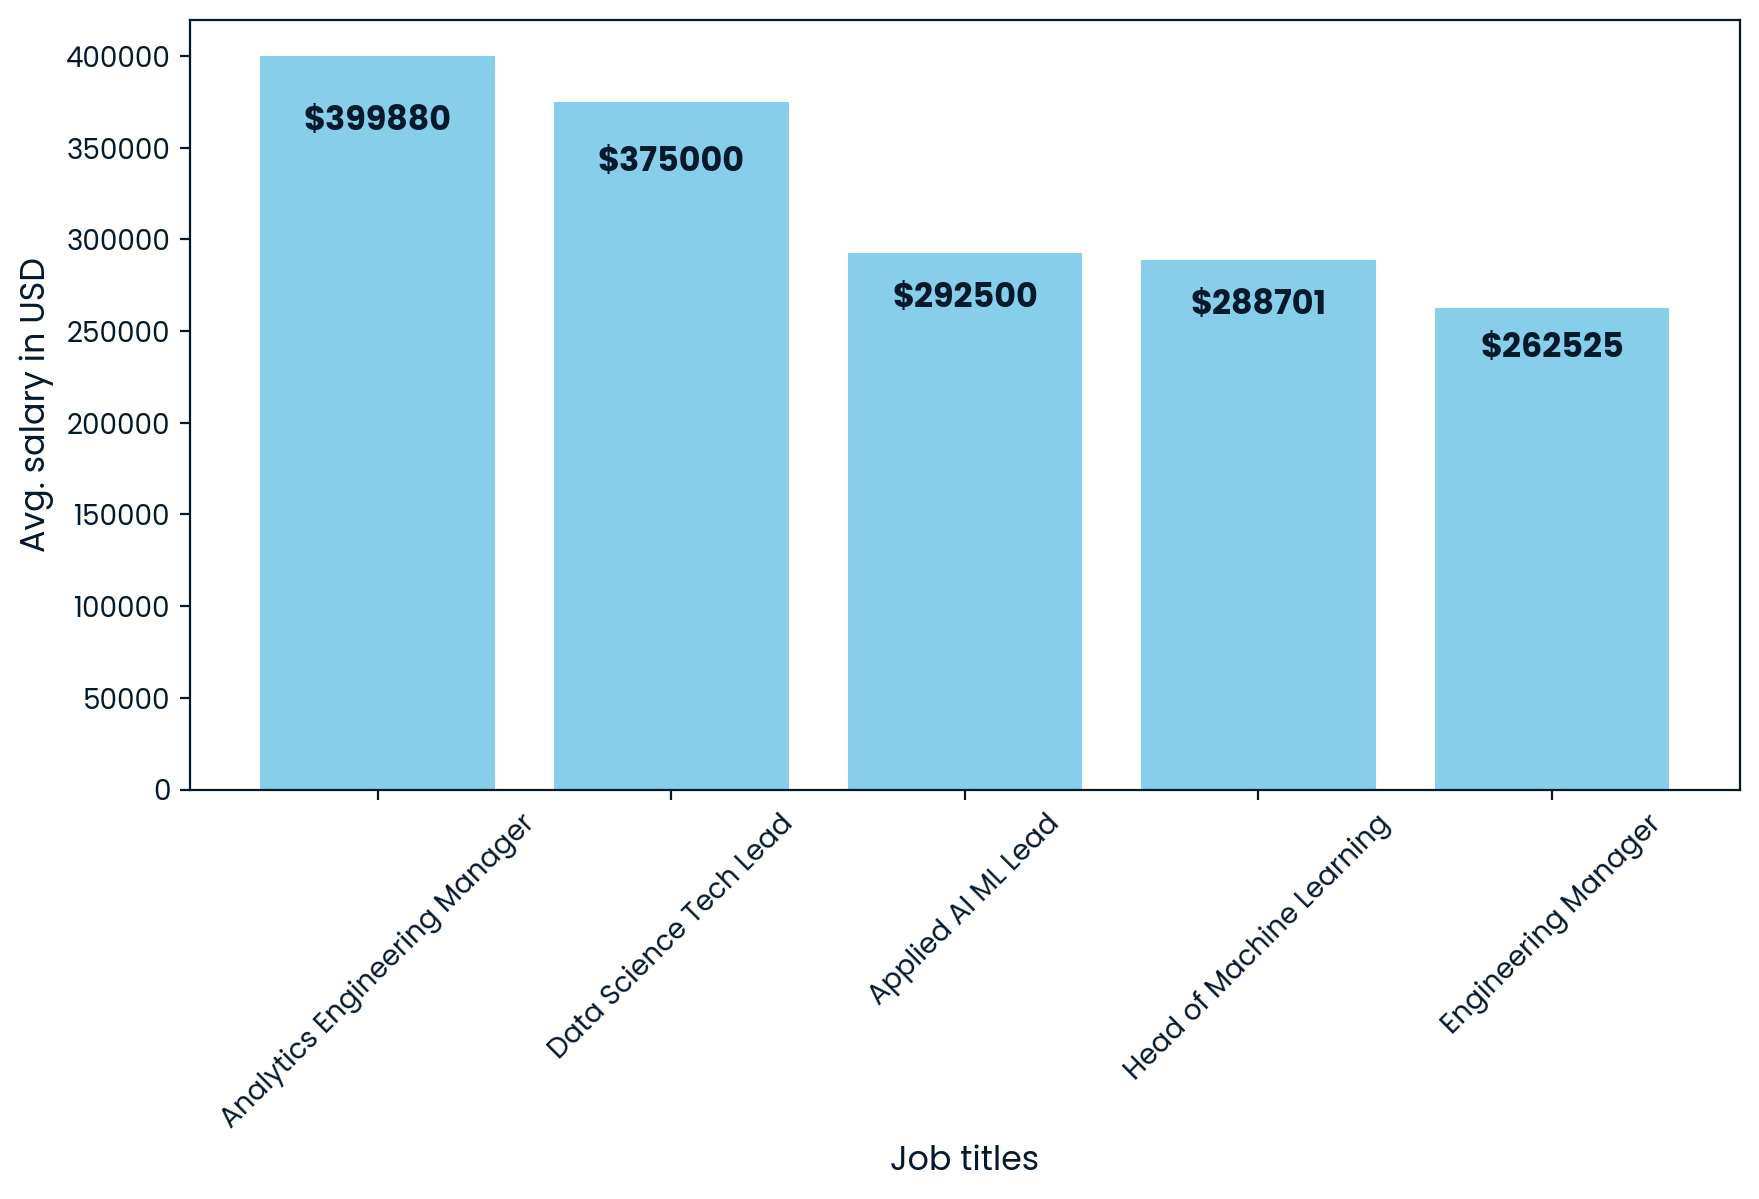

In [ ]:
# The top 5 job titles with the highest average salary in USD
x=df.groupby('job_title')['salary_in_usd'].mean().astype(int).sort_values(ascending= False)[:5]
plt.figure(figsize=(10,5))
plt.bar(x.index,x,color='skyblue')
for i, v in enumerate(x):
    plt.text(i, v * 0.9, str(f"${v}"), ha='center', fontsize=12,fontweight='bold')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.xlabel("Job titles",fontsize=12)
plt.ylabel("Avg. salary in USD",fontsize=12);


## 2️⃣ Average Salary Comparison for Remote Work

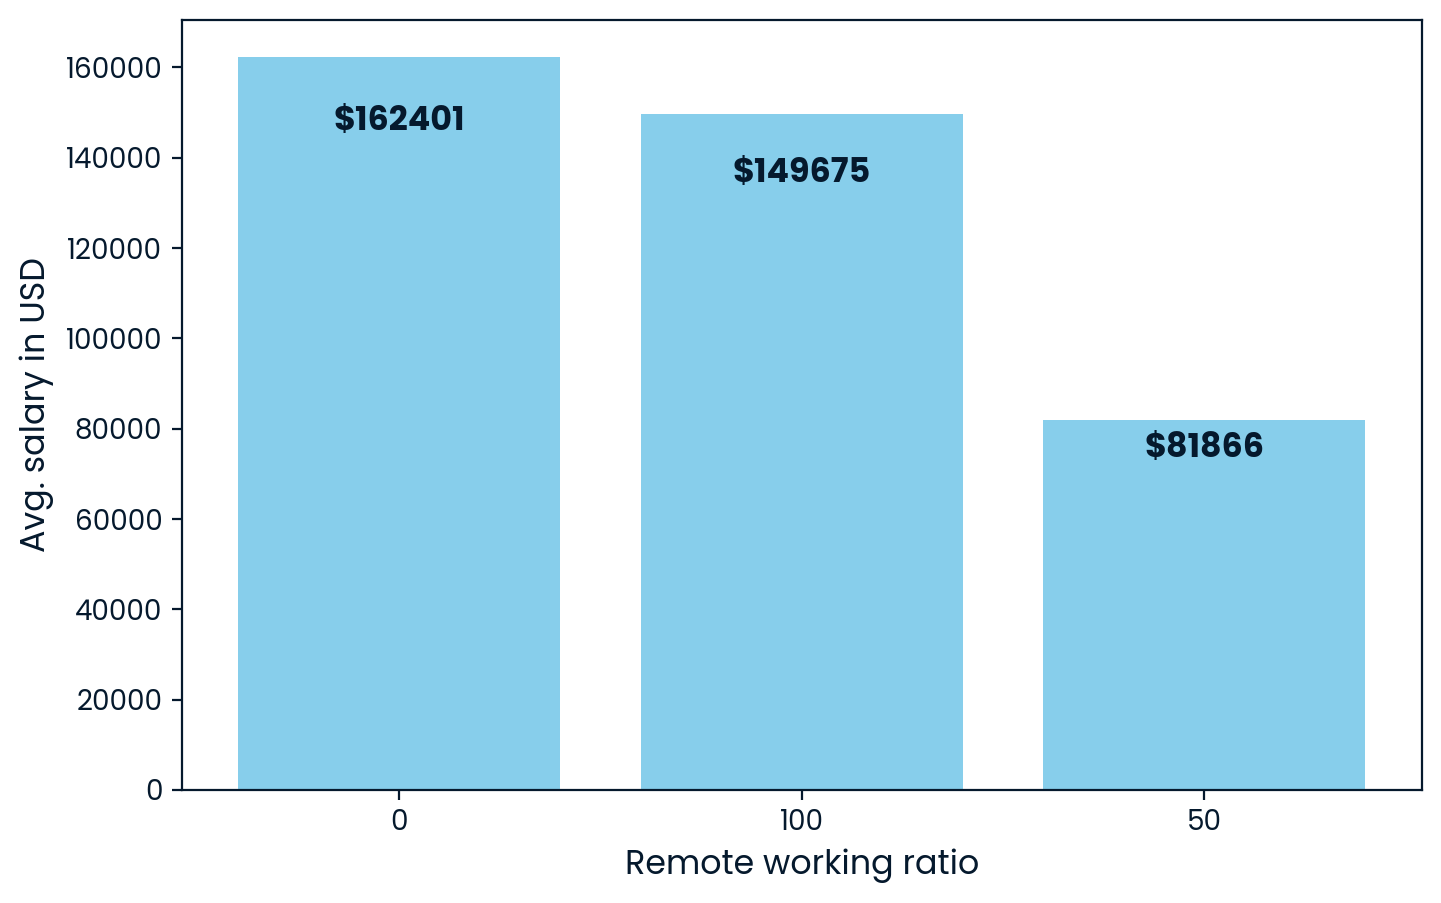

In [ ]:
# The average salaries for employees working remotely
df['remote_ratio']= df['remote_ratio'].astype('string')
x=df.groupby('remote_ratio')['salary_in_usd'].mean().astype(int)
plt.figure(figsize=(8,5))
plt.bar(x.index,x,color='skyblue')
for i, v in zip(x.index,x):
    plt.text(i, v * 0.9, str(f"${v}"), ha='center', fontsize=12,fontweight='bold')
plt.xlabel("Remote working ratio",fontsize=12)
plt.ylabel("Avg. salary in USD",fontsize=12);


##  3️⃣ Employee Distribution by Company Size

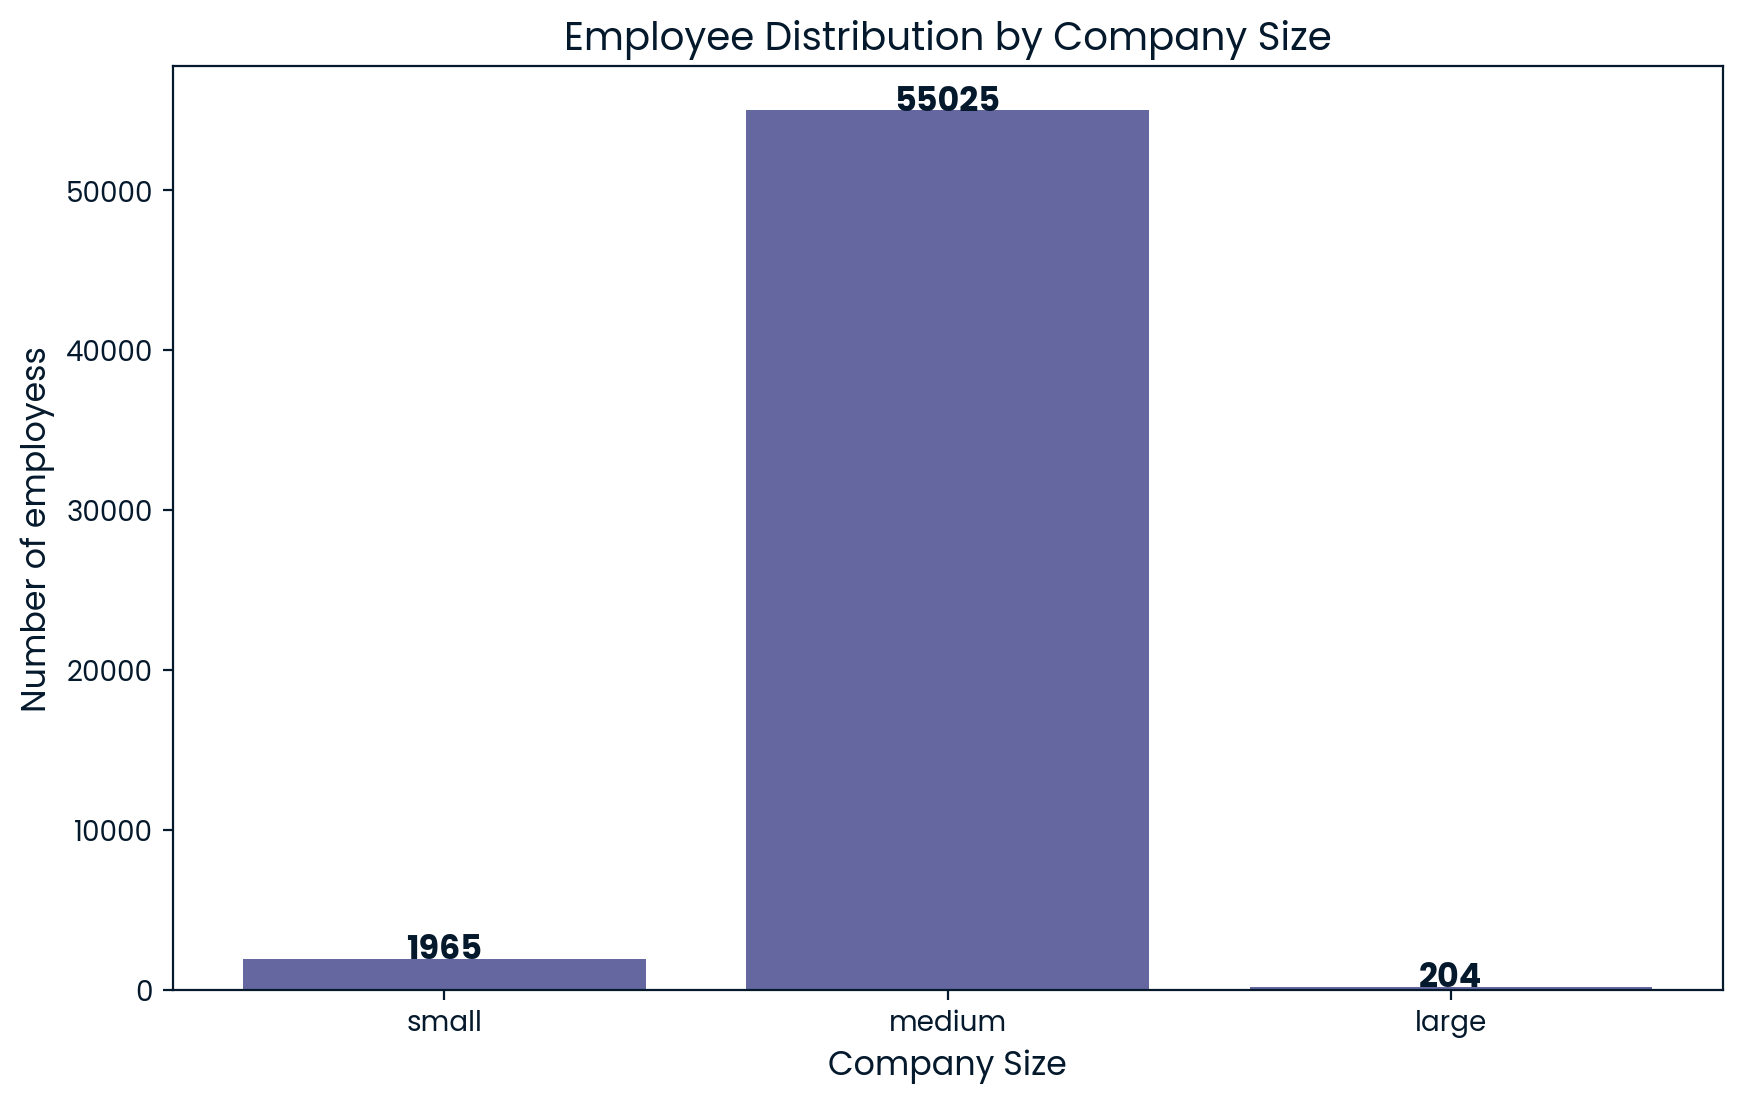

In [ ]:
# Group by company size and count the occurrences of salary values
x = df['company_size'].value_counts().sort_index()
company_size=["small","medium","large"]
plt.figure(figsize=(10,6))
plt.bar(company_size, x.values)
# Adding text annotations
for i, v in zip(company_size, x.values):
    plt.text(i, v * 1, v, ha='center', fontsize=12, fontweight='bold')
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Number of employess', fontsize=12)
plt.title('Employee Distribution by Company Size', fontsize=14)
plt.show()

## 4️⃣ Salary Distribution Across Company Sizes

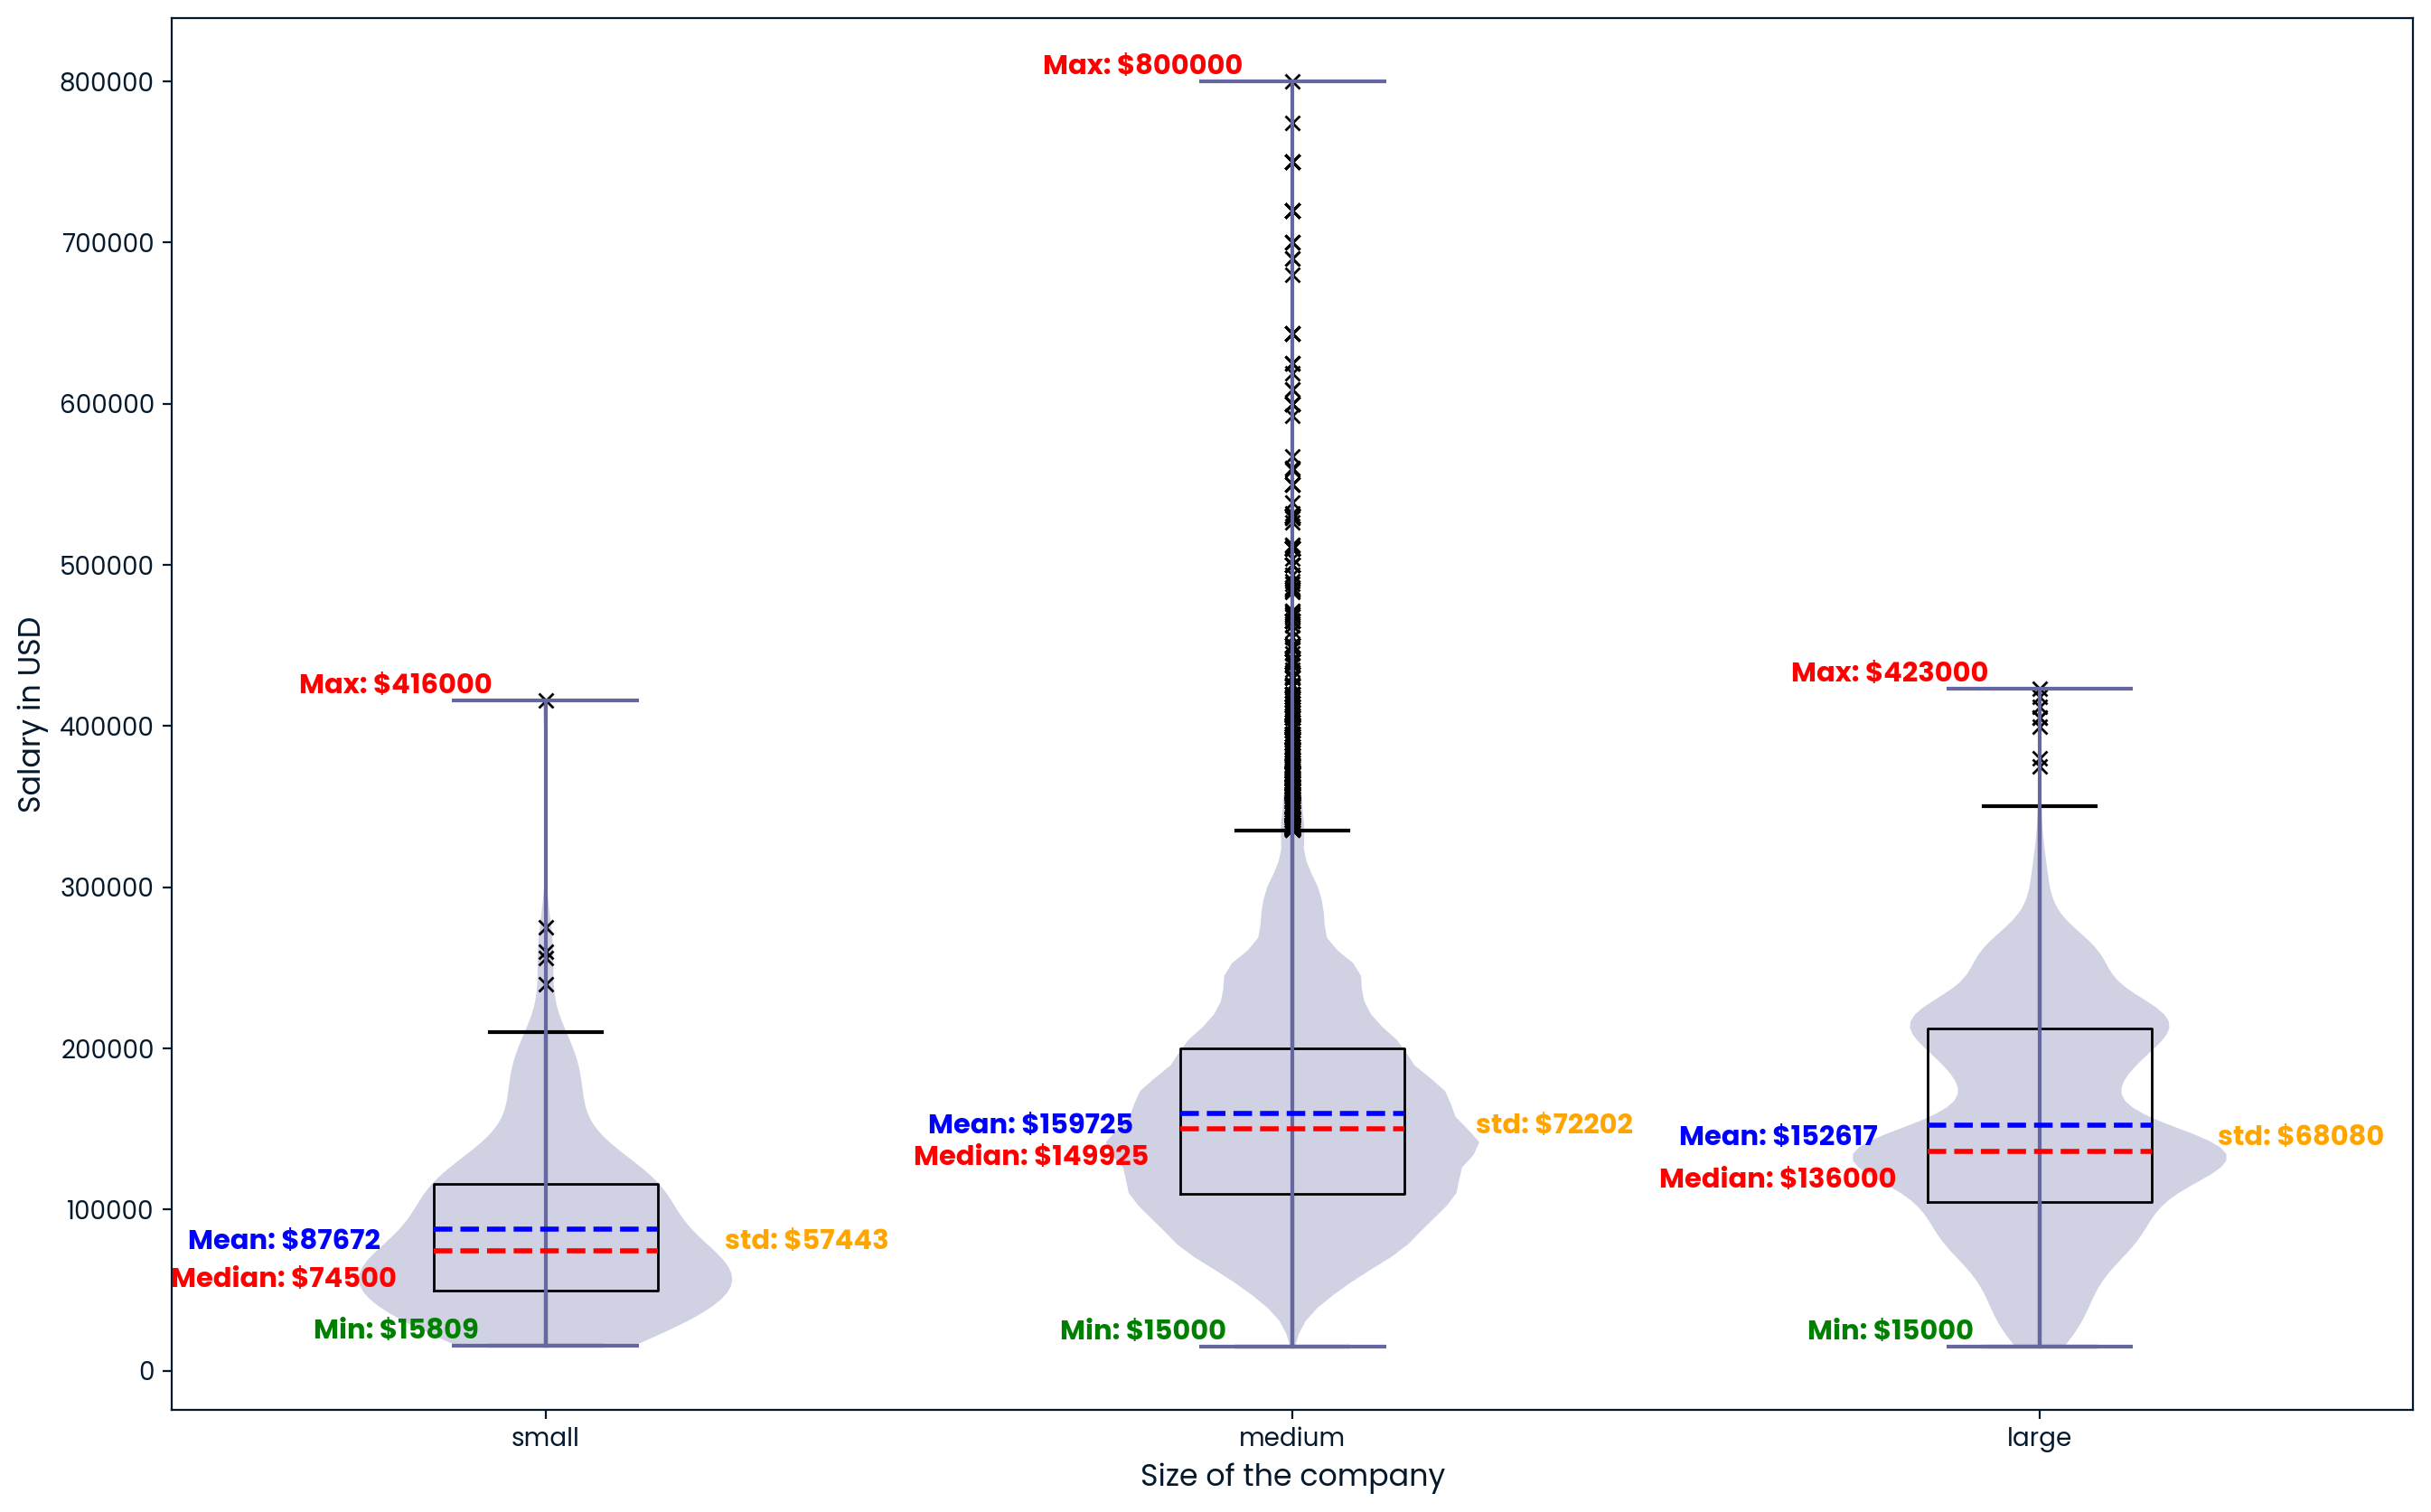

In [ ]:
# x=df.groupby('company_size')['salary_in_usd'].mean()
small,medium,large=[df[df['company_size']==size]['salary_in_usd'] for size in ['S','M', 'L']]
plt.figure(figsize=(16,10))
plt.boxplot([small, medium, large], 
            meanline=True, 
            showmeans=True, 
            medianprops={'color': 'red', 'linewidth': 2, 'linestyle': '--'},  # Median 
            meanprops={'color': 'blue', 'linewidth': 2},  # Mean 
            whiskerprops={'color': 'black', 'linewidth': 1.5},  # Whiskers
            capprops={'color': 'black', 'linewidth': 1.5},  # Caps
            sym='x');
# Add labels for min, max, and mean
for i, data in enumerate([small, medium, large], 1):
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    median_val = data.median()
    std_val=data.std() 
    # Annotate min, max, and mean
    plt.text(i-0.2, min_val, f'Min: ${min_val}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='green')
    plt.text(i-0.2, max_val, f'Max: ${max_val}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='red')
    plt.text(i-0.35, mean_val, f'Mean: ${mean_val:.0f}', ha='center', va='top', fontsize=11, fontweight='bold', color='blue')
    plt.text(i-0.35, median_val-10000, f'Median: ${median_val:.0f}', ha='center', va='top', fontsize=11, fontweight='bold', color='red')
    plt.text(i+0.35, mean_val, f'std: ${std_val:.0f}', ha='center', va='top', fontsize=11, fontweight='bold', color='orange')
plt.violinplot([small,medium,large]);
# ax=plt.gca().twinx()
# ax.bar(["small","medium","large"],df['company_size'].value_counts())
plt.xticks(ticks=[1,2,3],labels=["small","medium","large"])
plt.xlabel("Size of the company",fontsize=12)
plt.ylabel("Salary in USD",fontsize=12);